<a href="https://colab.research.google.com/github/Entspannter/CrispCerebella/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Entspannter/CrispCerebella.git

Cloning into 'CrispCerebella'...
remote: Enumerating objects: 654, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 654 (delta 39), reused 31 (delta 10), pack-reused 573
Receiving objects: 100% (654/654), 312.45 MiB | 24.95 MiB/s, done.
Resolving deltas: 100% (340/340), done.
Checking out files: 100% (200/200), done.


In [2]:
# file for all the data visualisation code
import pandas as pd
from numpy import unique
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import vstack
from IPython.display import display
from CrispCerebella.Code.data_loading import *
from CrispCerebella.Code.data_visualization import *


AttributeError: ignored

Train Dataset

Class=1	 	 	total=1226	 	 	percentage=16.675734494015234
Class=2	 	 	total=1073	 	 	percentage=14.594668117519042
Class=3	 	 	total=986	 	 	percentage=13.411316648531013
Class=4	 	 	total=1286	 	 	percentage=17.491838955386292
Class=5	 	 	total=1374	 	 	percentage=18.68879216539717
Class=6	 	 	total=1407	 	 	percentage=19.13764961915125

Test Dataset

Class=1	 	 	total=496	 	 	percentage=16.830675262979298
Class=2	 	 	total=471	 	 	percentage=15.982354937224297
Class=3	 	 	total=420	 	 	percentage=14.251781472684085
Class=4	 	 	total=491	 	 	percentage=16.661011197828298
Class=5	 	 	total=532	 	 	percentage=18.052256532066508
Class=6	 	 	total=537	 	 	percentage=18.22192059721751

Test and Train Dataset (All)

Class=1	 	 	total=1722	 	 	percentage=16.720069909699973
Class=2	 	 	total=1544	 	 	percentage=14.991746771531217
Class=3	 	 	total=1406	 	 	percentage=13.651810855422857
Class=4	 	 	total=1777	 	 	percentage=17.25410234003301
Class=5	 	 	total=1906	 	 	percentage=

,Train,Test
Activity Labels,,
WALKING,1226,496
WALKING UPSTAIRS,1073,471
WALKING DOWNSTAIRS,986,420
SITTING,1286,491
STANDING,1374,532
LAYING,1407,537


No of Features: 561
['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravi

,Train,Test
Activity Labels,,
WALKING,1226,496
WALKING UPSTAIRS,1073,471
WALKING DOWNSTAIRS,986,420
SITTING,1286,491
STANDING,1374,532
LAYING,1407,537


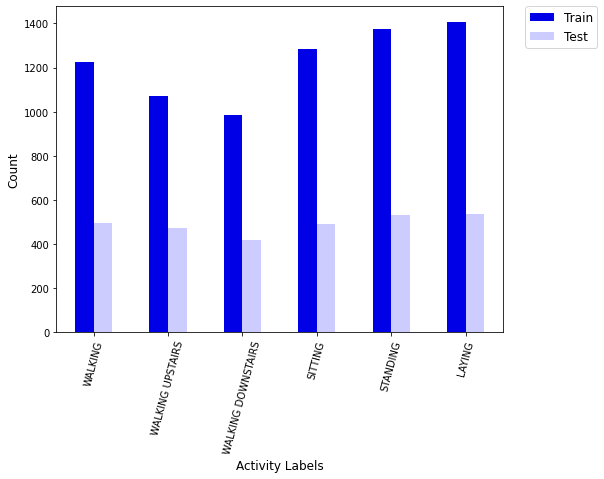

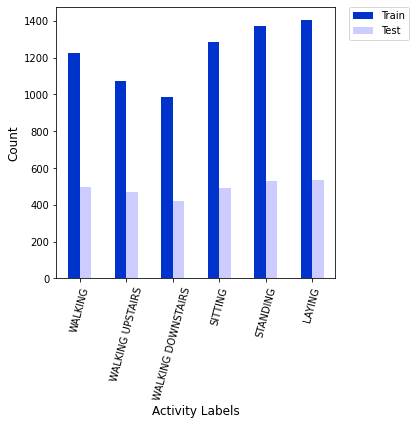

<Figure size 2160x864 with 0 Axes>

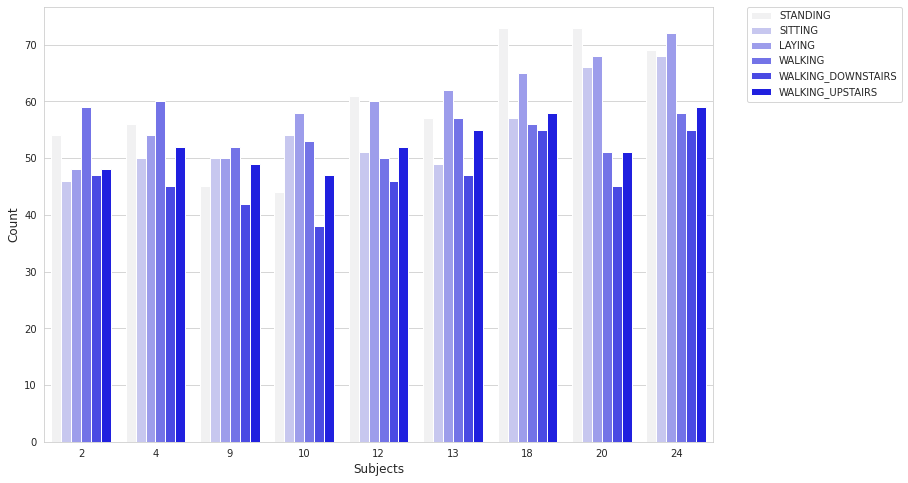

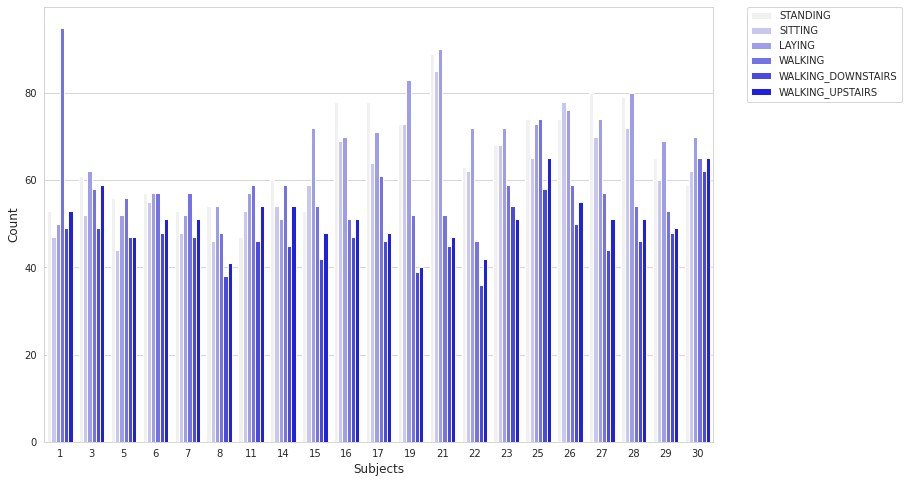

In [6]:
# load files and get a summary of the different class values

trainX,trainy = datasetloader('train', '/content/CrispCerebella/Dataset/UCI HAR Dataset/')

testX,testy = datasetloader('test', '/content/CrispCerebella/Dataset/UCI HAR Dataset/')

all_together = vstack((trainy, testy))
print('Train Dataset\n')
trainy_grouped = rows_by_class(trainy)
print('\nTest Dataset\n')
testy_grouped = rows_by_class(testy)
print('\nTest and Train Dataset (All)\n')
both_grouped = rows_by_class(all_together)

#visualize activity in both 'train' and 'test'
all_grouped_dfs = pd.concat([trainy_grouped, testy_grouped], axis=1, join='inner')
all_grouped_dfs.columns = ['Train','Test']
all_grouped_dfs['Activity Labels'] = ['WALKING', 'WALKING UPSTAIRS', 'WALKING DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
all_grouped_dfs.set_index(['Activity Labels'], inplace=True)
display(all_grouped_dfs)
ax = all_grouped_dfs.plot.bar(color = ('#0000e6', '#ccccff'), figsize=(8,6))
plt.xticks(rotation=75)
plt.ylabel("Count", fontsize=12)
plt.xlabel('Activity Labels', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)

# get the features from the file features.txt
features = list()
with open("/content/CrispCerebella/Dataset/UCI HAR Dataset/features.txt") as f:
 features = [line.split()[1] for line in f.readlines()]
print("No of Features: {}".format(len(features)))
print(features)

# get the test data from txt files to pandas dataffame
X_test = pd.read_csv('/content/CrispCerebella/Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
print(X_test.head())
# add subject column to the dataframe
X_test['subject'] = pd.read_csv('/content/CrispCerebella/Dataset/UCI HAR Dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('/content/CrispCerebella/Dataset/UCI HAR Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})
# put all columns in a single dataframe
test_sub = X_test
test_sub['Activity'] = y_test
test_sub['ActivityName'] = y_test_labels
test_sub.sample()

# get the train data from txt files to pandas dataffame
X_train = pd.read_csv('/content/CrispCerebella/Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
# add subject column to the dataframe
X_train['subject'] = pd.read_csv('/content/CrispCerebella/Dataset/UCI HAR Dataset/train/subject_train.txt', header=None, squeeze=True)
y_train = pd.read_csv('/content/CrispCerebella/Dataset/UCI HAR Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})
# put all columns in a single dataframe
train_sub = X_train
train_sub['Activity'] = y_train
train_sub['ActivityName'] = y_train_labels
train_sub.sample()

#visualize activity in both 'train' and 'test'
all_grouped_dfs = pd.concat([trainy_grouped, testy_grouped], axis=1, join='inner')
all_grouped_dfs.columns = ['Train','Test']
all_grouped_dfs['Activity Labels'] = ['WALKING', 'WALKING UPSTAIRS', 'WALKING DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
all_grouped_dfs.set_index(['Activity Labels'], inplace=True)
display(all_grouped_dfs)
ax = all_grouped_dfs.plot.bar(color = ('#0033cc', '#ccccff'), figsize=(5,5))
plt.xticks(rotation=75)
plt.ylabel("Count", fontsize=12)
plt.xlabel('Activity Labels', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(30,12))

#Visualize activity distribution for each subject
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Dejavu Sans"
plt.figure(figsize=(12,8))
#plt.title("Data provided by Each Subject (Test Data)", fontsize=20)
sns.countplot(x="subject",hue="ActivityName", data = test_sub, palette="light:b")
sns.color_palette("light:b")
plt.ylabel("Count", fontsize=12)
plt.xlabel('Subjects', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#Visualize activity distribution for each subject
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Dejavu Sans"
plt.figure(figsize=(12,8))
#plt.title("Data provided by Each Subject (Test Data)", fontsize=20)
sns.countplot(x="subject",hue="ActivityName", data = train_sub, palette="light:b")
sns.color_palette("light:b")
plt.ylabel("Count", fontsize=12)
plt.xlabel('Subjects', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


Subjects in the training set: [ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
Data for subject No. 26: (392, 128, 9) (392, 1)  
  
 
 


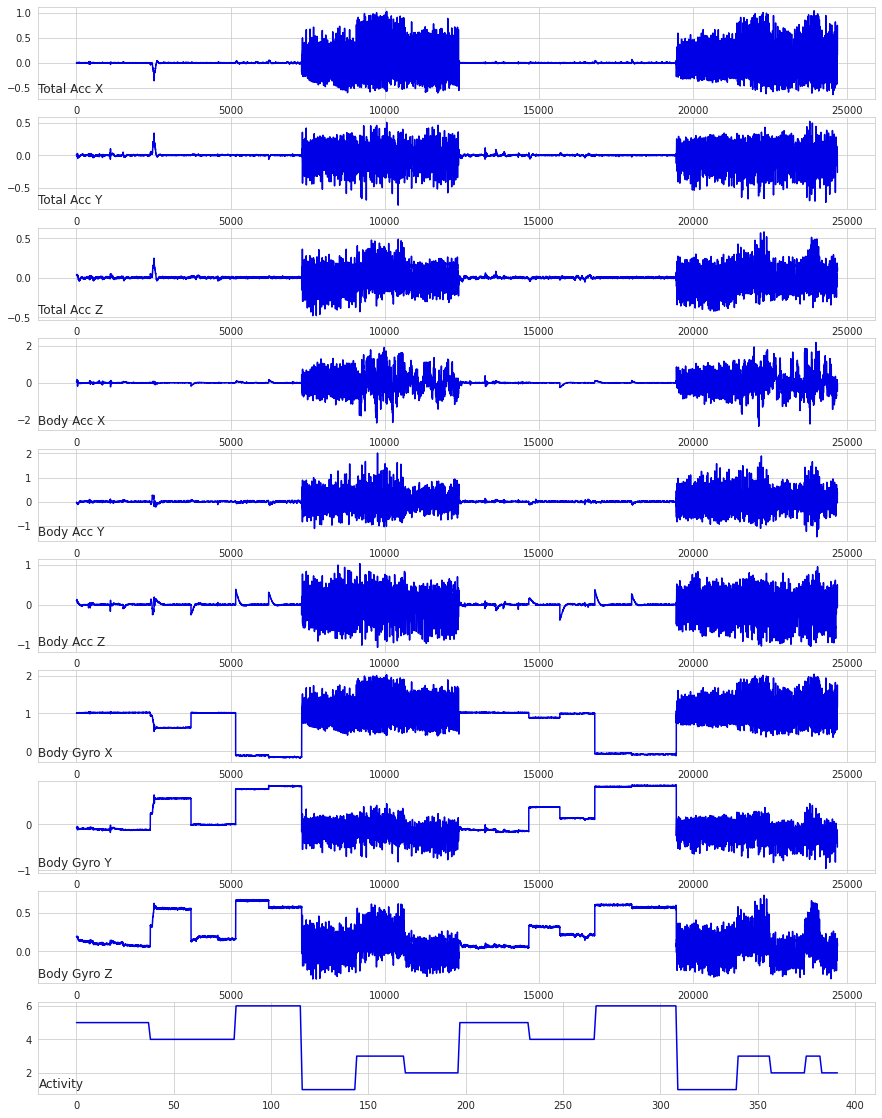

In [7]:
# load data
plt.show()
# load mapping of rows to subjects
sub_map = dataloader('/content/CrispCerebella/Dataset/UCI HAR Dataset/train/subject_train.txt')
train_subjects = unique(sub_map)
print("Subjects in the training set:", train_subjects)
# get the data for one subject
sub_id = train_subjects[16]
subX, suby = individual_timeseries(trainX, trainy, sub_map, sub_id)
print(f'Data for subject No. {sub_id}:', subX.shape, suby.shape, " \n  \n \n ")

# plot data for subject
plot_subject(subX, suby)